In [85]:
# Required packages (check which are required)
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import networkx as nx
import pandas as pd
import numpy as np
import scipy as sp
import datetime as dt
import community
from shapely.geometry import Polygon


import importlib
import ddom

import random
import math

import cmocean as cmo

In [86]:
# Read the data from data_processing.ipynb
sa_calibration_data = pd.read_csv('../Data_Labour/calibration_data.csv')
employment_SSYK = pd.read_csv('../Data_Labour/occupational_employment.csv', sep = ',')
SSYK_shock = pd.read_csv('../Data_Labour/occupation_shock.csv', sep = ',', index_col = 0)
hours_data = pd.read_csv('../Data_Labour/hours_data.csv', sep = ',', index_col = 0)

G = nx.read_graphml('../Data_Labour/Occ_mob_sweden.graphml')

In [123]:
importlib.reload(ddom)
employment = employment_SSYK[['ssyk3', '2016']]
employment = {str(employment['ssyk3'].iloc[i]):employment['2016'].iloc[i] for i in range(len(employment))}
node_names = G.nodes()

# setup network
employed = {str(name):e for name,e in employment.items() if str(name) in node_names}
unemployed = {name:0 for name in node_names}
vacancies = {name:0 for name in node_names}

target_demand = {str(name):e for name,e in employment.items() if str(name) in node_names}
of_data = SSYK_shock.to_dict()['Computerisation Probability']
of_data = {str(code):prob for code, prob in of_data.items()}

attributes = {'employed':employed, 'unemployed':unemployed, 'vacancies':vacancies,
                'target_demand':target_demand, 'comp_prob':of_data}

a = 0.035
delta_u = 0.011
delta_nu = 0.005
gamma_u = 0.1
gamma_nu = gamma_u
timestep = 8

period = 10.25
k = 0.79
avg_hours_0 = hours_data.loc[2016,'average_hours/year']

# I want 1, 16 

u_ss_ls = []
vac_ss_ls = []
c_u_ss_ls = []
c_vac_ss_ls = []

mid = 0.006
delta_ls = [(mid + i*0.001, mid - i*0.001) for i in range(6)]

for d_tup in delta_ls:
    G = nx.read_graphml('../Data_Labour/Occ_mob_sweden.graphml')
    en_ls = ddom.deterministic_simulation(G, round(d_tup[0],3), round(d_tup[1],3), gamma_u, gamma_nu, 
                                   timestep, period, attributes, shock_period = shock_period, k = k, 
                                    avg_hours_0 = avg_hours_0, t_0 = shock_period/2, steady_state = True)
    G = nx.read_graphml('../Data_Labour/Occ_mob_sweden.graphml')
    c_ls = ddom.deterministic_simulation(G, round(d_tup[0],3), round(d_tup[1],3), gamma_u, gamma_nu, 
                                   timestep, period, attributes, shock_period = shock_period, k = k, 
                                    avg_hours_0 = avg_hours_0, 
                                   t_0 = shock_period/2, complete_network = True, steady_state = True)
    u_ss_ls.append(en_ls[0])
    vac_ss_ls.append(en_ls[1])
    c_u_ss_ls.append(c_ls[0])
    c_vac_ss_ls.append(c_ls[1])
                
mid = 0.006
delta_ls = [(mid - i*0.001, mid + i*0.001) for i in range(6)]


for d_tup in delta_ls:
    G = nx.read_graphml('../Data_Labour/Occ_mob_sweden.graphml')
    en_ls = ddom.deterministic_simulation(G, round(d_tup[0],3), round(d_tup[1],3), gamma_u, gamma_nu, 
                                   timestep, period, attributes, shock_period = shock_period, k = k, 
                                    avg_hours_0 = avg_hours_0, t_0 = shock_period/2, steady_state = True)
    G = nx.read_graphml('../Data_Labour/Occ_mob_sweden.graphml')
    c_ls = ddom.deterministic_simulation(G, round(d_tup[0],3), round(d_tup[1],3), gamma_u, gamma_nu, 
                                   timestep, period, attributes, shock_period = shock_period, k = k, 
                                    avg_hours_0 = avg_hours_0, 
                                   t_0 = shock_period/2, complete_network = True, steady_state = True)
    u_ss_ls.append(en_ls[0])
    vac_ss_ls.append(en_ls[1])
    c_u_ss_ls.append(c_ls[0])
    c_vac_ss_ls.append(c_ls[1])



Simulation started at:  2020-05-18 04:48:05.226294
simulation took: 0:00:25.308795
Simulation started at:  2020-05-18 04:48:30.745481
simulation took: 0:03:10.076778
Simulation started at:  2020-05-18 04:51:40.922307
simulation took: 0:00:23.613094
Simulation started at:  2020-05-18 04:52:04.726081
simulation took: 0:03:13.059343
Simulation started at:  2020-05-18 04:55:17.890455
simulation took: 0:00:23.767910
Simulation started at:  2020-05-18 04:55:41.862785
simulation took: 0:03:10.718278
Simulation started at:  2020-05-18 04:58:52.718948
simulation took: 0:00:23.684028
Simulation started at:  2020-05-18 04:59:16.598145
simulation took: 0:03:11.945363
Simulation started at:  2020-05-18 05:02:28.807201
simulation took: 0:00:23.558346
Simulation started at:  2020-05-18 05:02:52.520010
simulation took: 0:03:10.526495
Simulation started at:  2020-05-18 05:06:03.147079
simulation took: 0:00:23.373883
Simulation started at:  2020-05-18 05:06:26.715695
simulation took: 0:03:09.379426
Simu

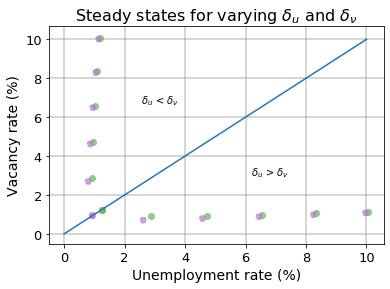

In [128]:
cols = ["#62bc5a", "#bd77d7"]

fig, ax = plt.subplots(1, 1, figsize = (6,4))

ax.grid(linewidth=2, color='#999999', alpha=0.4)
ax.tick_params(axis='both', which='both', labelsize=13,
                labelbottom=True, bottom=True, labelleft=True, left=True)
ax.grid(linewidth=2, color='#999999', alpha=0.4)
ax.tick_params(axis='both', which='both', labelsize=13,
                labelbottom=True, bottom=True, labelleft=True, left=True)

    
ax.set_title(r'Steady states for varying $\delta_u$ and $\delta_\nu$', fontsize = 16)
ax.text(0.66, 0.33, r'$\delta_u$ > $\delta_\nu$', fontsize=10, horizontalalignment='center', 
        verticalalignment='center', transform=ax.transAxes)
ax.text(0.33, 0.66, r'$\delta_u$ < $\delta_\nu$', fontsize=10, horizontalalignment='center',
           verticalalignment='center', transform=ax.transAxes)
ax.scatter(u_ss_ls, vac_ss_ls, c = cols[0], alpha = 0.7, ls = '-')
ax.scatter(c_u_ss_ls, c_vac_ss_ls, c = cols[1], alpha = 0.7, ls = '--')
ax.plot(np.arange(0,11,1), np.arange(0,11,1))
ax.set_xlabel('Unemployment rate (%)', fontsize = 14)
ax.set_ylabel('Vacancy rate (%)', fontsize = 14)
ax.set
plt.savefig('../Graphs/bev_shifts.pdf', dpi=425, bbox_inches='tight')

In [125]:
u_ss_ls

[1.253122724794777,
 2.8655340650635814,
 4.717303180030142,
 6.552492538517384,
 8.333377347157196,
 10.050191416897984,
 1.253122724794777,
 0.9293745898917638,
 0.942118306434303,
 1.0101711031180818,
 1.0941948843447773,
 1.1848661004780667]

In [82]:
importlib.reload(ddom)
employment = employment_SSYK[['ssyk3', '2016']]
employment = {str(employment['ssyk3'].iloc[i]):employment['2016'].iloc[i] for i in range(len(employment))}
node_names = G.nodes()

# setup network
employed = {str(name):e for name,e in employment.items() if str(name) in node_names}
unemployed = {name:0 for name in node_names}
vacancies = {name:0 for name in node_names}

target_demand = {str(name):e for name,e in employment.items() if str(name) in node_names}
of_data = SSYK_shock.to_dict()['Computerisation Probability']
of_data = {str(code):prob for code, prob in of_data.items()}

attributes = {'employed':employed, 'unemployed':unemployed, 'vacancies':vacancies,
                'target_demand':target_demand, 'comp_prob':of_data}

# Parameters short calibration
#delta_u = 0.009
#delta_nu = 0.002
#gamma_u = 0.1
#gamma_nu = gamma_u
#timestep = 14

# Paramters long calibration (currently running)
a = 0.035
delta_u = 0.011
delta_nu = 0.005
gamma_u = 0.1
gamma_nu = gamma_u
timestep = 8

period = 10.25
k = 0.79
avg_hours_0 = hours_data.loc[2016,'average_hours/year']

output = {}

for shock_period in [30]:
    output[str(shock_period)] = ddom.deterministic_simulation(G, delta_u, delta_nu, gamma_u, gamma_nu, 
                                       timestep, period, attributes, shock_period = shock_period, k = k, 
                                        avg_hours_0 = avg_hours_0, 
                                       t_0 = shock_period/2, complete_network = True)

Simulation started at:  2020-05-17 15:13:13.237321
Simulation took:  0:24:45.537200


In [81]:
for period, out in output.items():
    vac_data = pd.DataFrame(out['vacancy_data'])
    u_data = pd.DataFrame(out['unemployment_data'])
    e_data = pd.DataFrame(out['employment_data'])
    td_data = pd.DataFrame(out['target_demand_data'])
    td_data.to_csv('../Data_Labour/simulation_output/det_td_simulation_'+period+'.csv', sep = ',', index = False)
    vac_data.to_csv('../Data_Labour/simulation_output/det_vac_simulation_'+period+'.csv', sep = ',', index = False)
    e_data.to_csv('../Data_Labour/simulation_output/det_emp_simulation_'+period+'.csv', sep = ',', index = False)
    u_data.to_csv('../Data_Labour/simulation_output/det_unemp_simulation_'+period+'.csv', sep = ',', index = False)

In [83]:
for period, out in output.items():
    vac_data = pd.DataFrame(out['vacancy_data'])
    u_data = pd.DataFrame(out['unemployment_data'])
    e_data = pd.DataFrame(out['employment_data'])
    td_data = pd.DataFrame(out['target_demand_data'])
    td_data.to_csv('../Data_Labour/simulation_output/c_det_td_simulation_'+period+'.csv', sep = ',', index = False)
    vac_data.to_csv('../Data_Labour/simulation_output/c_det_vac_simulation_'+period+'.csv', sep = ',', index = False)
    e_data.to_csv('../Data_Labour/simulation_output/c_det_emp_simulation_'+period+'.csv', sep = ',', index = False)
    u_data.to_csv('../Data_Labour/simulation_output/c_det_unemp_simulation_'+period+'.csv', sep = ',', index = False)

In [84]:
employment = employment_SSYK[['ssyk3', '2016']]
employment = {str(employment['ssyk3'].iloc[i]):employment['2016'].iloc[i] for i in range(len(employment))}
node_names = G.nodes()

importlib.reload(ddom)


# setup network
employed = {str(name):e for name,e in employment.items() if str(name) in node_names}
unemployed = {name:0 for name in node_names}
vacancies = {name:[] for name in node_names}

target_demand = {str(name):e for name,e in employment.items() if str(name) in node_names}
of_data = SSYK_shock.to_dict()['Computerisation Probability']
of_data = {str(code):prob for code, prob in of_data.items()}

attributes = {'employed':employed, 'unemployed':unemployed, 'vacancies':vacancies,
                'target_demand':target_demand, 'comp_prob':of_data}

# Parameters short calibration
#delta_u = 0.009
#delta_nu = 0.002
#gamma_u = 0.1
#gamma_nu = gamma_u
#timestep = 14

# Paramters long calibration (currently running)
delta_u = 0.011
delta_nu = 0.005
gamma_u = 0.1
gamma_nu = gamma_u
timestep = 8

# General parameters
period = 10.25
shock_period = 30
k = 0.79
avg_hours_0 = hours_data.loc[2016,'average_hours/year']
t_0 = shock_period/2

vac_datalist = []
u_datalist = []
e_datalist = []
td_datalist = []
lt_u_datalist = []

for i in range(3,6):
    G = nx.read_graphml('../Data_Labour/Occ_mob_sweden.graphml')
    output_abm = ddom.simulation(G, delta_u, delta_nu, gamma_u, gamma_nu, timestep, 
                                 period, shock_period, k, avg_hours_0, t_0, attributes, complete_network = False)
    vac_data = pd.DataFrame(output_abm['vacancy_data'])
    u_data = pd.DataFrame(output_abm['unemployment_data'])
    e_data = pd.DataFrame(output_abm['employment_data'])
    td_data = pd.DataFrame(output_abm['target_demand_data'])
    vac_datalist.append(vac_data)
    u_datalist.append(u_data)
    e_datalist.append(e_data)
    td_datalist.append(td_data)
    vac_data.to_csv('../Data_Labour/simulation_output/c_vac_simulation_'+str(i)+'.csv', sep = ',', index = False)
    e_data.to_csv('../Data_Labour/simulation_output/c_emp_simulation_'+str(i)+'.csv', sep = ',', index = False)
    u_data.to_csv('../Data_Labour/simulation_output/c_unemp_simulation_'+str(i)+'.csv', sep = ',', index = False)
    
    

Simulation started at:  2020-05-17 15:44:47.711196
Simulation completed 2020-05-17 20:44:41.966399
Simulation took:  4:59:54.256317
Simulation started at:  2020-05-17 20:44:42.438862


KeyboardInterrupt: 